In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns


In [3]:
mean_01 = np.array([1, 0.5])
cov_01 = np.array([[1, 0.1], [0.1, 1.2]])

mean_02 = np.array([4, 5])
cov_02 = np.array([[1, 0.1], [0.1, 1.2]])

# print mean_01
# print cov_01

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 500)
print dist_01.shape, dist_02.shape

(500, 2) (500, 2)


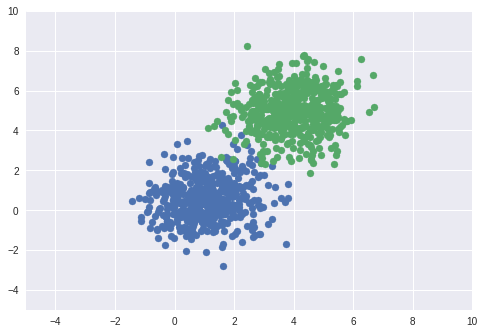

In [4]:
plt.figure(0)
plt.xlim(-5, 10)
plt.ylim(-5, 10)

plt.scatter(dist_01[:, 0], dist_01[:, 1])
plt.scatter(dist_02[:, 0], dist_02[:, 1])#, color='red')
plt.show()

In [5]:

r = dist_01.shape[0] + dist_02.shape[0]
c = dist_01.shape[1] + 1
data = np.zeros((r, c))
print data.shape

data[:dist_01.shape[0], :2] = dist_01
data[dist_01.shape[0]:, :2] = dist_02
data[dist_01.shape[0]:, -1] = 1.0

print data.mean(axis=0)

(1000, 3)
[ 2.52227761  2.75947127  0.5       ]


In [6]:
np.random.shuffle(data)
print data[:10]

[[  2.10479667e+00  -1.02963482e+00   0.00000000e+00]
 [ -7.50222561e-01  -5.99464285e-01   0.00000000e+00]
 [  4.36977340e+00   6.34853180e+00   1.00000000e+00]
 [  2.74500314e+00   5.66082684e+00   1.00000000e+00]
 [ -2.48001859e-01   3.92103540e-02   0.00000000e+00]
 [ -1.87849322e-04   1.74514586e-01   0.00000000e+00]
 [  4.00096905e+00   4.30640338e+00   1.00000000e+00]
 [ -6.29657462e-01   9.33031418e-01   0.00000000e+00]
 [  2.39946733e+00   1.96338202e+00   0.00000000e+00]
 [ -1.13482184e+00  -5.31423126e-01   0.00000000e+00]]


In [21]:
split=int(0.8*data.shape[0])
X_train=data[:split,:-1]
y_train=data[:split,-1:]
X_test=data[split:,:-1]
y_test=data[split:,-1:]
print X_test.shape

(200, 2)


In [33]:
# hypothesis function
def hypothesis(x, w,b):
    '''
        Function Accepts Input vectort x, Weight Vector w, 
        and bias(intercept) b.
    '''
    h=(x*w).sum() + b
    
    return sigmoid(h)

#sigmoid Funtion
def sigmoid(z):
    return 1.0/(1.0+np.exp(-1.0*z))

# error compute
def get_error(y_true, x, w,b):
    err = 0.0
    
    # Get number of examples
    m = x.shape[0]
    for ix in range(m):
        # for each example compute the binary cross-entropy
        if y_true[ix]==1:
            err+= -1.0*np.log2(hypothesis(x[ix],w,b))
        else:
            err+= -1.0*np.log2(1.0 - hypothesis(x[ix],w,b))
    # Get mean error
    err = err / (m)
    return err

# error gradient
def get_grads(y_true, x, w ,b):
    grad_w = np.zeros(w.shape)
    grad_b = 0.0
    
    # Get number of examples
    m = x.shape[0]
    
    for ix in range(m):
        # for each example compute the gradients
        grad_w += (y_true[ix] - hypothesis(x[ix], w , b))*(-1)*(x[ix])
        grad_b += (y_true[ix] - hypothesis(x[ix], w , b))*(-1)
    
    # Get mean grads
    grad_w = grad_w / m
    grad_b = grad_b / m
    return [grad_w, grad_b]

# update weights using grad. desc.
def grad_descent(x, y_true, w,b, learning_rate=0.1):
    error = get_error(y_true, x, w, b )
    [grad_w, grad_b] = get_grads(y_true, x, w ,b)
    
    w = w - learning_rate*grad_w
    b = b - learning_rate*grad_b
    
    return error, w,b
def Predict (x,w,b):
    prob=hypothesis(x,w,b)
    if prob<0.5 :
        return 0
    else:
        return 1

In [34]:
loss=[]
w=np.random.random((X_train.shape[1],))
b=np.random.random()

In [36]:
for ix in range(100):
    l,w,b=grad_descent(X_train,y_train,w,b,learning_rate=0.01)
    loss.append(l)

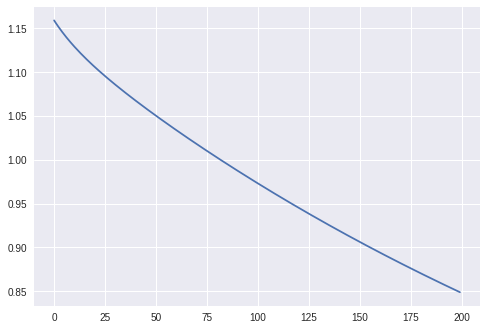

In [39]:
plt.figure(0)
plt.plot(loss)
plt.show()

In [ ]:
def get_acc(x_tst,y_tst,w,b):
    y_pred=[]

    for ix in range(y_tst.shape[0]):
        y_pred.append
    